In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn import metrics

In [252]:
dataset = pd.read_csv('E:/TSF/Iris.csv')

In [253]:
dataset.shape

(150, 6)

In [254]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [256]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [257]:
a = pd.DataFrame(dataset)
new_data = a.drop(columns = ['Species', 'Id'])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [258]:
new_data.shape

(150, 4)

In [259]:
within_cluster_sum_of_square = [] 

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(new_data)
    within_cluster_sum_of_square.append(km.inertia_)

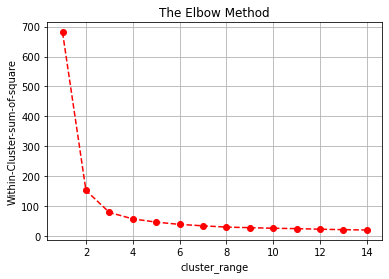

In [260]:
plt.plot(cluster_range, within_cluster_sum_of_square,'go--', color = 'red')
plt.grid()
plt.xlabel('cluster_range')
plt.ylabel('Within-Cluster-sum-of-square')
plt.title('The Elbow Method')
plt.show()


In [261]:

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(new_data)

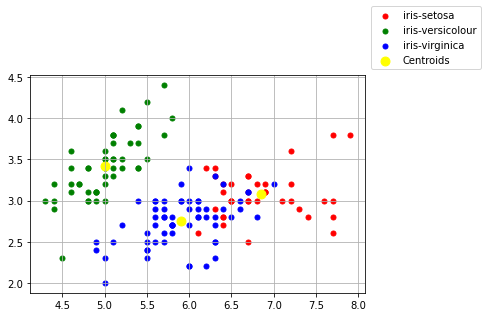

In [262]:
x = new_data.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s=25, c= 'red', label = 'iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s=25, c= 'green', label = 'iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s=25, c= 'blue', label = 'iris-virginica')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s=80, color = '#ffff00', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.36,1.34))
plt.grid() 
plt.show()